# Basic MLP

In [403]:
import numpy as np

In [404]:
class node: 
    def __init__(self, which, childnodes) -> None:
        self.theta = np.random.random(3)
        if which =='sigmoid':
            self.activation_function = sigmoid
            self.activation_function_derivative = sigmoid_derivative
        elif which == 'relu':
            self.activation_function = relu
            self.activation_function_derivative = relu_derivative
            
        
        self.childnodes = childnodes
        self.parentnodes = []  # for backpropagation
        self.z = 0
        self.return_saved = False
        


    def activation(self):
        if self.return_saved:
            return self.z
        # store childactivations for backpropagation
        self.childactivations = np.array([node.activation() for node in self.childnodes])
        self.a = self._preactivation(self.theta, self.childactivations)
        self.z = self.activation_function(self.a)
        # print('a',self.a, 'z',self.z)
        self.return_saved = True
        return self.z

    def _preactivation(self, theta, x):
        return theta @ x

    def backpropagation(self, alpha):
        # compute error gradient
        self.error_gradient = 0
        for i,parentnode in enumerate(self.parentnodes):
            if parentnode.__class__.__name__ != 'node':  # last layer, where loss is 2(ypred-y)
                self.error_gradient+=parentnode 
            else:
                self.error_gradient+=parentnode.error_gradient *  parentnode.activation_function_derivative(parentnode.z) *  parentnode.get_theta(self)             

        # print('error_gradient',self.error_gradient)
        # compute new weights
        for j in range(len(self.theta)):
            self.theta[j] = self.theta[j] -alpha*self.error_gradient * self.activation_function_derivative(self.z) * self.childnodes[j].z

    def get_theta(self, childnode):
        for i, cn in enumerate(self.childnodes):
            if cn == childnode:
                return self.theta[i]
    
    def undo_return_saved(self):
        self.return_saved = False
        for node in self.childnodes:
            if node.__class__.__name__ == 'node':
                node.undo_return_saved()
    
    
                
class value:
    def __init__(self,value) -> None:
      self.z = value
    
    def activation(self):
        return self.z



def sigmoid(a):
    return 1/(1+np.e**(-a))

def sigmoid_derivative(a):
    return a*(1-a)

def relu(a):
    return max(0,a)

def relu_derivative(a):
    return int(a>0)



### Structure

In [405]:
# hypothesis(node03)
#         /|\    
# bias02 node12 node22  
#         /|\    //|  
# bias01 node11 node21  
#         /|\    //|  
# bias00   x0     x1    

In [406]:
# input
bias00 = value(1)
x0 = value(0)
x1 = value(0)

# first hidden layer
bias01 = value(1)
node11 = node('sigmoid', childnodes=[bias00, x0, x1])
node21 = node('sigmoid', childnodes=[bias00, x0, x1])

# second hidden layer
bias02 = value(1)
node12 = node('sigmoid', childnodes=[bias01, node11, node21])
node22 = node('sigmoid', childnodes=[bias01, node11, node21])

# link back backpropagation
node11.parentnodes = [node12, node22]
node21.parentnodes = [node12, node22]
# output
node03 = node('sigmoid', childnodes=[bias02, node12, node22])
# node13 = node('sigmoid', childnodes=[bias02, node12, node22])

# link back for backpropagation
node12.parentnodes = [node03]
node22.parentnodes = [node03]

def hypothesis(x):
    x0.z = x[0]
    x1.z = x[1]
    
    y0 = node03.activation()
    # y1 = node13.activation(compute_state)

    
    
    # node13.change_compute_state(compute_state)
    # print(y0)
    node03.undo_return_saved()
    return [y0]


# probably should have used this from the start ->
layers = [[node03],[node12,node22], [node11, node21]]

def backpropagation(y, alpha):
    loss_derivative(node03.z, y)
    node03.parentnodes = [loss_derivative(node03.z, y)]
    
    for layer in layers:
        for node in layer:
            node.backpropagation(alpha=0.1)

    # node13.backpropagation()

def loss_derivative(ypred, y):
    return 2*(ypred-y)


In [407]:
for layer in layers:
    print('layer')
    for node in layer:
        print(node.theta)

layer
[0.03930218 0.59694486 0.71063289]
layer
[0.41696176 0.61061056 0.24830671]
[0.98009307 0.56438952 0.44269984]
layer
[0.79101798 0.50929619 0.10326919]
[0.34318376 0.71704104 0.00650775]


## Test XOR


### Forward Phase

In [408]:
X = np.array([[0,0], 
              [0,1],
              [1,0],
              [1,1]])
y = np.array([0,1,1,0])

In [409]:
hypothesis(X[0])

[0.7441360161775147]

### Backward phase

#### Stochastic (1 sample)

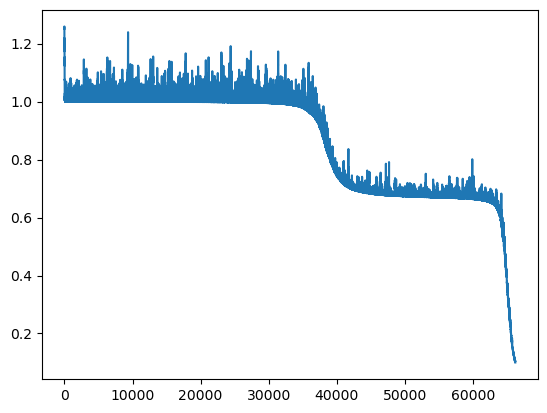

In [411]:
import matplotlib.pyplot as plt
errors = []

for _ in range(100000):
    idx = np.random.randint(0,len(y))
    hypothesis(X[idx])
    backpropagation(y[idx], alpha=0.05)
    error = sum((hypothesis(X[i])[0]-y[i])**2 for i in range(len(y)))
    errors.append(error)
    if error<0.1:
        break

plt.plot(np.arange(len(errors)),errors)

In [413]:
for i in range(len(y)):
    print(f'X: {X[i]}')
    print(f'y: {y[i]} \ny_pred: {hypothesis(X[i])[0]}\n')


X: [0 0]
y: 0 
y_pred: 0.06094990783143816

X: [0 1]
y: 1 
y_pred: 0.8375762146361848

X: [1 0]
y: 1 
y_pred: 0.8331687711029321

X: [1 1]
y: 0 
y_pred: 0.20489064920615738

